In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('https://codefinity-content-media.s3.eu-west-1.amazonaws.com/b71ff7ac-3932-41d2-a4d8-060e24b00129/marketing_bank.csv')

# Define features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

# Create and train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues arise
lr.fit(X, y)

# Predict on the training set
y_pred = lr.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on the training set: {accuracy:.4f}")


Accuracy on the training set: 0.8275


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

df = pd.read_csv('https://codefinity-content-media.s3.eu-west-1.amazonaws.com/b71ff7ac-3932-41d2-a4d8-060e24b00129/circles.csv')
X = df[['X1', 'X2']]
y = df['y']

#plt.scatter(df['X1'], df['X2'], c=df['y'])

X = StandardScaler().fit_transform(X)
lr = LogisticRegression().fit(X, y)
print(cross_val_score(lr, X, y).mean())

0.45999999999999996


The dataset is for sure not linearly separable. Let's look at the Logistic Regression performance , The result is awful. Regular Logistic Regression is not suited for this task. Your task is to check whether the PolynomialFeatures will help. To find the best C parameter, you will use the GridSearchCV class.

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Read the data and assign X, y variables
df = pd.read_csv('https://codefinity-content-media.s3.eu-west-1.amazonaws.com/b71ff7ac-3932-41d2-a4d8-060e24b00129/circles.csv')
X = df[['X1', 'X2']]
y = df['y']

# Preprocess the data using Pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial Features of degree 2
    ('scaler', StandardScaler())  # Standard Scaler to normalize the data
])

# Transform the data
X_poly = pipe.fit_transform(X)

# Define the logistic regression model
lr = LogisticRegression()

# Define the parameter grid to search over
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # C parameter values for GridSearchCV

# Initialize and train a GridSearchCV object
grid_cv = GridSearchCV(lr, param_grid, cv=5)  # 5-fold cross-validation
grid_cv.fit(X_poly, y)

# Print the best score and the best estimator
print(f"Best score: {grid_cv.best_score_}")
print(f"Best estimator: {grid_cv.best_estimator_}")


Best score: 0.9120000000000001
Best estimator: LogisticRegression(C=10)


c:\Users\Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


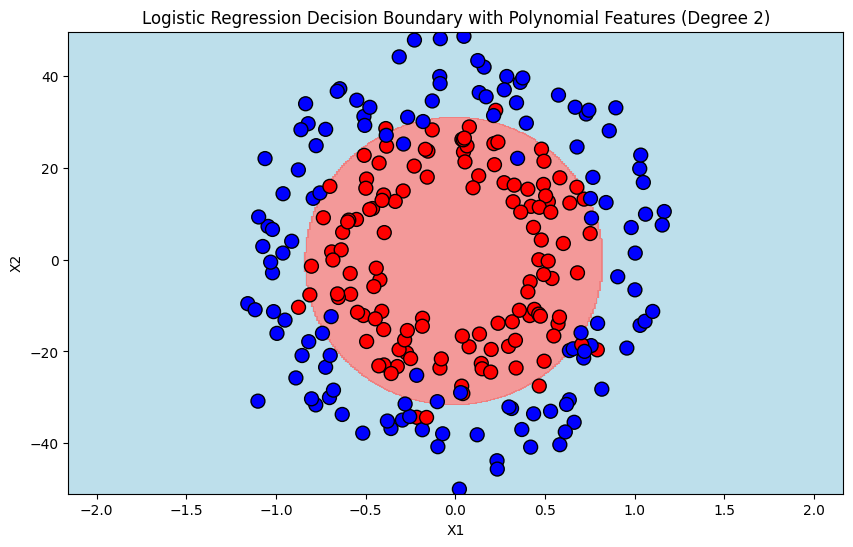

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Best logistic regression model from GridSearchCV
best_model = grid_cv.best_estimator_

# Generate a mesh grid over the feature space to visualize decision boundary
x_min, x_max = X['X1'].min() - 1, X['X1'].max() + 1
y_min, y_max = X['X2'].min() - 1, X['X2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Prepare the polynomial and scaled features for the grid
X_grid_poly = pipe.transform(np.c_[xx.ravel(), yy.ravel()])

# Predict the probability for each point on the grid
Z = best_model.predict(X_grid_poly)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue', 'lightcoral')))

# Plot the original data points
plt.scatter(X['X1'], X['X2'], c=y, edgecolor='k', marker='o', s=100, cmap=ListedColormap(('blue', 'red')))
plt.title("Logistic Regression Decision Boundary with Polynomial Features (Degree 2)")
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Display the plot
plt.show()
